In [2]:
import numpy as np
import matplotlib
import pandas as pd
from sklearn.model_selection import train_test_split


dataset = pd.read_csv('/Users/eddie/OneDrive/Documents/Injury Dataset/2013-2022/2018-2022 Data Cleaned Trainable.csv')

X = pd.DataFrame(dataset.iloc[:,:22].values)
Y = pd.DataFrame(dataset.iloc[:,22:].values)
print(X)
print(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# X_train.reshape(35276,22,1)
# X_test.reshape(8819,22,1)

print(X_train.shape)
print(Y_train.shape)

       0   1   2   3   4   5   6   7   8   9   ...  12  13  14   15  16  17  \
0       1   1   1   1   0   1   3  55   1   1  ...   0   0   1    0   0   1   
1       1   1   1   1   0   1   0  16   1   1  ...   0   0   1    0   0   1   
2       1   1   1   1   3   0   3  41   1   1  ...   0   1   1    0   1   1   
3       1   1   2   2   3   0   0  21   2   1  ...   0   0   1    0   0   1   
4       1   1   2   1   3   0   1  66   1   1  ...   0   0   1  174   0   1   
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ...  ..  ..   
44090   2   4   1   2   0   1   0  53   1   1  ...   1   0   1    0   0   1   
44091   2   4   1   2   0   1   2  27   1   1  ...   1   0   1    0   1   1   
44092   2   4   1   2   1   0   1  25   1   1  ...   1   1   1  155   0   1   
44093   2   4   1   2   1   0   1  21   2   1  ...   1   1   1  120   0   0   
44094   2   4   1   1   0   1   1  43   1   1  ...   0   1   1   70   1   1   

       18  19  20  21  
0       2   2   3   1  
1  

In [3]:
features = pd.DataFrame(dataset.iloc[:,:32])
features = features.columns
print(features)

Index(['STATE', 'SEASON', 'DAY', 'HOUR', 'HARM_EV', 'MAN_COLL', 'BODY_TYP',
       'AGE', 'GENDER', 'PER_TYP', 'SEAT_POS', 'REST_USE', 'AIR_BAG',
       'DRINKING', 'ATST_TYP', 'ALC_RES', 'DRUGS', 'DSTATUS', 'ETHNICITY ',
       'RUR_URB', 'FUNC_SYS', 'IMPACT1', 'INJ_SEV'],
      dtype='object')


In [4]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, SimpleRNN
from tensorflow.keras.optimizers import Adam
from keras import layers

In [5]:
model = Sequential()

# First SimpleRNN layer
model.add(SimpleRNN(128, input_shape=(22, 1), return_sequences=True))
model.add(Dropout(0.5))

# Second SimpleRNN layer
model.add(SimpleRNN(64, return_sequences=True))
model.add(Dropout(0.5))

# Third SimpleRNN layer
model.add(SimpleRNN(32, return_sequences=False))  # This will output a single vector for the next layer
model.add(Dropout(0.5))

# Dense layer with more units
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# Output layer (binary classification)
model.add(Dense(3, activation='softmax'))
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train,Y_train,epochs = 200,batch_size=128)


Epoch 1/200


276/276 [==============================] - 9s 19ms/step - loss: 0.4198 - accuracy: 0.8046
Epoch 2/200
276/276 [==============================] - 6s 21ms/step - loss: 0.2355 - accuracy: 0.8874
Epoch 3/200
276/276 [==============================] - 6s 23ms/step - loss: 0.2244 - accuracy: 0.8979
Epoch 4/200
276/276 [==============================] - 6s 22ms/step - loss: 0.2146 - accuracy: 0.9039
Epoch 5/200
276/276 [==============================] - 6s 23ms/step - loss: 0.2124 - accuracy: 0.9063
Epoch 6/200
276/276 [==============================] - 6s 22ms/step - loss: 0.2223 - accuracy: 0.9040
Epoch 7/200
276/276 [==============================] - 6s 22ms/step - loss: 0.2061 - accuracy: 0.9108
Epoch 8/200
276/276 [==============================] - 6s 21ms/step - loss: 0.2060 - accuracy: 0.9108
Epoch 9/200
276/276 [==============================] - 6s 22ms/step - loss: 0.2152 - accuracy: 0.9088
Epoch 10/200
276/276 [==============================] - 6s 22ms/step - loss: 0.

In [6]:
def find_max_index(arr):
    # print(arr)
    # print(max_value)
    return np.argmax(arr)
res = model.predict(X_test)
actual = []
for num in res:
    actual.append(np.argmax(num))
from sklearn.metrics import classification_report
print(classification_report(Y_test,actual,digits=6))

276/276 [==============================] - 2s 5ms/step
              precision    recall  f1-score   support

           0   0.771306  0.782825  0.777023      1607
           1   0.782419  0.770885  0.776609      1628
           2   1.000000  1.000000  1.000000      5584

    accuracy                       0.918131      8819
   macro avg   0.851242  0.851237  0.851211      8819
weighted avg   0.918162  0.918131  0.918131      8819



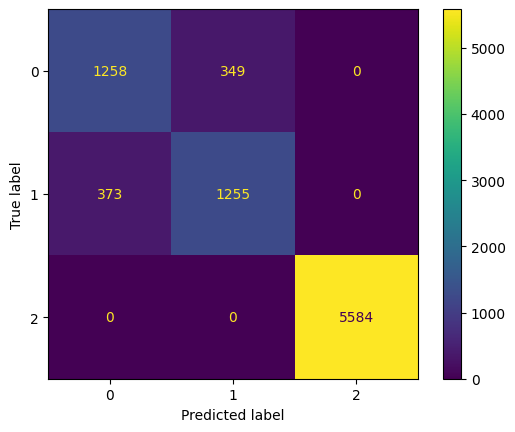

In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confusionmatrix = confusion_matrix(Y_test, actual)
cm_display = ConfusionMatrixDisplay(confusionmatrix, display_labels=[0,1,2])
cm_display.plot()

In [ ]:
import shap
from sklearn.naive_bayes import CategoricalNB

explainer = shap.KernelExplainer(model.predict, X_test[:400])
shap_values = explainer.shap_values(X_test[:400])
shap_values = shap_values.squeeze()
# print(shap_values)
# shap.summary_plot(shap_values,X_test[:10],feature_names = features,plot_type="bar", plot_size=(20,15),show=False)
# print(shap_values.shape)
shap.summary_plot(shap_values[:,:,0],X_test[:400],feature_names = features, plot_size=(20,15),show=False)

c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


13/13 [==============================] - 0s 4ms/step


Using 400 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
  0%|          | 0/400 [00:00<?, ?it/s]

26150/26150 [==============================] - 117s 4ms/step


  0%|          | 1/400 [02:22<15:45:42, 142.21s/it]

26150/26150 [==============================] - 118s 5ms/step


  0%|          | 2/400 [04:39<15:24:07, 139.32s/it]

26150/26150 [==============================] - 120s 5ms/step


  1%|          | 3/400 [06:58<15:21:25, 139.26s/it]

26150/26150 [==============================] - 118s 4ms/step


  1%|          | 4/400 [09:16<15:14:20, 138.54s/it]

26150/26150 [==============================] - 121s 5ms/step


  1%|▏         | 5/400 [11:35<15:13:44, 138.80s/it]

26150/26150 [==============================] - 119s 5ms/step


  2%|▏         | 6/400 [13:52<15:08:41, 138.38s/it]

26150/26150 [==============================] - 120s 5ms/step


  2%|▏         | 7/400 [16:11<15:06:37, 138.42s/it]

26150/26150 [==============================] - 120s 5ms/step


  2%|▏         | 8/400 [18:30<15:06:05, 138.69s/it]

26150/26150 [==============================] - 121s 5ms/step


  2%|▏         | 9/400 [20:56<15:17:36, 140.81s/it]

26150/26150 [==============================] - 111s 4ms/step


  2%|▎         | 10/400 [23:03<14:49:09, 136.79s/it]

26150/26150 [==============================] - 107s 4ms/step


  3%|▎         | 11/400 [25:05<14:17:08, 132.21s/it]

26150/26150 [==============================] - 104s 4ms/step


  3%|▎         | 12/400 [27:07<13:53:43, 128.93s/it]

26150/26150 [==============================] - 105s 4ms/step


  3%|▎         | 13/400 [29:08<13:37:05, 126.68s/it]

26150/26150 [==============================] - 104s 4ms/step


  4%|▎         | 14/400 [31:09<13:23:49, 124.95s/it]

26150/26150 [==============================] - 109s 4ms/step


  4%|▍         | 15/400 [33:15<13:23:46, 125.26s/it]

26150/26150 [==============================] - 105s 4ms/step


  4%|▍         | 16/400 [35:16<13:13:29, 123.98s/it]

26150/26150 [==============================] - 110s 4ms/step


  4%|▍         | 17/400 [37:23<13:16:58, 124.85s/it]

26150/26150 [==============================] - 111s 4ms/step


  4%|▍         | 18/400 [39:28<13:15:43, 124.98s/it]

26150/26150 [==============================] - 112s 4ms/step


  5%|▍         | 19/400 [41:37<13:20:58, 126.14s/it]

26150/26150 [==============================] - 110s 4ms/step


  5%|▌         | 20/400 [43:43<13:19:11, 126.19s/it]

26150/26150 [==============================] - 111s 4ms/step


  5%|▌         | 21/400 [45:48<13:13:11, 125.57s/it]

26150/26150 [==============================] - 109s 4ms/step


  6%|▌         | 22/400 [47:52<13:09:23, 125.30s/it]

26150/26150 [==============================] - 103s 4ms/step


  6%|▌         | 23/400 [49:50<12:53:36, 123.12s/it]

26150/26150 [==============================] - 109s 4ms/step


  6%|▌         | 24/400 [51:56<12:55:47, 123.80s/it]

26150/26150 [==============================] - 105s 4ms/step


  6%|▋         | 25/400 [53:57<12:48:22, 122.94s/it]

26150/26150 [==============================] - 108s 4ms/step


  6%|▋         | 26/400 [55:59<12:45:45, 122.85s/it]

26150/26150 [==============================] - 109s 4ms/step


  7%|▋         | 27/400 [58:05<12:49:37, 123.80s/it]

26150/26150 [==============================] - 112s 4ms/step


  7%|▋         | 28/400 [1:00:13<12:54:01, 124.84s/it]

26150/26150 [==============================] - 106s 4ms/step


  7%|▋         | 29/400 [1:02:14<12:46:06, 123.90s/it]

26150/26150 [==============================] - 111s 4ms/step


  8%|▊         | 30/400 [1:04:22<12:50:34, 124.96s/it]

26150/26150 [==============================] - 106s 4ms/step


  8%|▊         | 31/400 [1:06:23<12:41:50, 123.88s/it]

26150/26150 [==============================] - 111s 4ms/step


  8%|▊         | 32/400 [1:08:29<12:44:24, 124.63s/it]

26150/26150 [==============================] - 107s 4ms/step


  8%|▊         | 33/400 [1:10:32<12:38:26, 124.00s/it]

26150/26150 [==============================] - 110s 4ms/step


  8%|▊         | 34/400 [1:12:37<12:37:56, 124.25s/it]

26150/26150 [==============================] - 107s 4ms/step


  9%|▉         | 35/400 [1:14:39<12:32:37, 123.72s/it]

26150/26150 [==============================] - 108s 4ms/step


  9%|▉         | 36/400 [1:16:43<12:30:51, 123.77s/it]

26150/26150 [==============================] - 107s 4ms/step


  9%|▉         | 37/400 [1:18:45<12:26:10, 123.33s/it]

26150/26150 [==============================] - 109s 4ms/step


 10%|▉         | 38/400 [1:20:50<12:26:43, 123.77s/it]

26150/26150 [==============================] - 105s 4ms/step


 10%|▉         | 39/400 [1:22:50<12:16:39, 122.44s/it]

26150/26150 [==============================] - 107s 4ms/step


 10%|█         | 40/400 [1:24:52<12:15:11, 122.53s/it]

26150/26150 [==============================] - 103s 4ms/step


 10%|█         | 41/400 [1:26:51<12:06:52, 121.48s/it]

26150/26150 [==============================] - 108s 4ms/step


 10%|█         | 42/400 [1:28:54<12:07:46, 121.97s/it]

26150/26150 [==============================] - 106s 4ms/step


 11%|█         | 43/400 [1:30:57<12:06:00, 122.02s/it]

26150/26150 [==============================] - 105s 4ms/step


 11%|█         | 44/400 [1:32:56<11:59:11, 121.21s/it]

26150/26150 [==============================] - 105s 4ms/step


 11%|█▏        | 45/400 [1:34:56<11:55:50, 120.99s/it]

26150/26150 [==============================] - 105s 4ms/step


 12%|█▏        | 46/400 [1:36:58<11:54:01, 121.02s/it]

26150/26150 [==============================] - 105s 4ms/step


 12%|█▏        | 47/400 [1:38:58<11:50:31, 120.77s/it]

26150/26150 [==============================] - 106s 4ms/step


 12%|█▏        | 48/400 [1:40:59<11:49:55, 121.01s/it]

26150/26150 [==============================] - 105s 4ms/step


 12%|█▏        | 49/400 [1:42:59<11:45:17, 120.56s/it]

26150/26150 [==============================] - 106s 4ms/step


 12%|█▎        | 50/400 [1:45:01<11:46:20, 121.09s/it]

26150/26150 [==============================] - 103s 4ms/step


 13%|█▎        | 51/400 [1:46:59<11:39:14, 120.21s/it]

26150/26150 [==============================] - 107s 4ms/step


 13%|█▎        | 52/400 [1:49:02<11:41:37, 120.97s/it]

26150/26150 [==============================] - 106s 4ms/step


 13%|█▎        | 53/400 [1:51:03<11:40:17, 121.09s/it]

26150/26150 [==============================] - 107s 4ms/step


 14%|█▎        | 54/400 [1:53:05<11:39:32, 121.31s/it]

26150/26150 [==============================] - 105s 4ms/step


 14%|█▍        | 55/400 [1:55:06<11:36:04, 121.06s/it]

26150/26150 [==============================] - 105s 4ms/step


 14%|█▍        | 56/400 [1:57:07<11:34:04, 121.06s/it]

26150/26150 [==============================] - 106s 4ms/step


 14%|█▍        | 57/400 [1:59:08<11:32:50, 121.20s/it]

26150/26150 [==============================] - 107s 4ms/step


 14%|█▍        | 58/400 [2:01:11<11:33:24, 121.65s/it]

26150/26150 [==============================] - 105s 4ms/step


 15%|█▍        | 59/400 [2:03:11<11:27:48, 121.02s/it]

26150/26150 [==============================] - 107s 4ms/step


 15%|█▌        | 60/400 [2:05:14<11:29:39, 121.70s/it]

26150/26150 [==============================] - 103s 4ms/step


 15%|█▌        | 61/400 [2:07:12<11:21:53, 120.69s/it]

26150/26150 [==============================] - 108s 4ms/step


 16%|█▌        | 62/400 [2:09:16<11:25:07, 121.62s/it]

26150/26150 [==============================] - 103s 4ms/step


 16%|█▌        | 63/400 [2:11:15<11:18:02, 120.72s/it]

26150/26150 [==============================] - 106s 4ms/step


 16%|█▌        | 64/400 [2:13:15<11:15:14, 120.58s/it]

26150/26150 [==============================] - 104s 4ms/step


 16%|█▋        | 65/400 [2:15:15<11:11:49, 120.33s/it]

26150/26150 [==============================] - 104s 4ms/step


 16%|█▋        | 66/400 [2:17:15<11:09:24, 120.25s/it]

26150/26150 [==============================] - 104s 4ms/step


 17%|█▋        | 67/400 [2:19:14<11:06:04, 120.01s/it]

26150/26150 [==============================] - 107s 4ms/step


 17%|█▋        | 68/400 [2:21:16<11:07:38, 120.66s/it]

26150/26150 [==============================] - 105s 4ms/step


 17%|█▋        | 69/400 [2:23:16<11:04:22, 120.43s/it]

26150/26150 [==============================] - 107s 4ms/step


 18%|█▊        | 70/400 [2:25:19<11:06:01, 121.10s/it]

26150/26150 [==============================] - 103s 4ms/step


 18%|█▊        | 71/400 [2:27:18<11:00:17, 120.42s/it]

26150/26150 [==============================] - 106s 4ms/step


 18%|█▊        | 72/400 [2:29:18<10:59:03, 120.56s/it]

26150/26150 [==============================] - 113s 4ms/step


 18%|█▊        | 73/400 [2:31:29<11:13:24, 123.56s/it]

26150/26150 [==============================] - 124s 5ms/step


 18%|█▊        | 74/400 [2:33:48<11:35:51, 128.07s/it]

26150/26150 [==============================] - 105s 4ms/step


 19%|█▉        | 75/400 [2:35:49<11:23:05, 126.11s/it]

26150/26150 [==============================] - 105s 4ms/step


 19%|█▉        | 76/400 [2:37:50<11:12:27, 124.53s/it]

26150/26150 [==============================] - 105s 4ms/step


 19%|█▉        | 77/400 [2:39:50<11:03:25, 123.24s/it]

26150/26150 [==============================] - 106s 4ms/step


 20%|█▉        | 78/400 [2:41:52<10:59:34, 122.90s/it]

26150/26150 [==============================] - 103s 4ms/step


 20%|█▉        | 79/400 [2:43:50<10:49:45, 121.45s/it]

26150/26150 [==============================] - 105s 4ms/step


 20%|██        | 80/400 [2:45:51<10:46:41, 121.25s/it]

26150/26150 [==============================] - 103s 4ms/step


 20%|██        | 81/400 [2:47:49<10:39:29, 120.28s/it]

26150/26150 [==============================] - 106s 4ms/step


 20%|██        | 82/400 [2:49:50<10:37:40, 120.32s/it]

26150/26150 [==============================] - 104s 4ms/step


 21%|██        | 83/400 [2:51:49<10:33:50, 119.97s/it]

26150/26150 [==============================] - 105s 4ms/step


 21%|██        | 84/400 [2:53:48<10:30:41, 119.75s/it]

26150/26150 [==============================] - 104s 4ms/step


 21%|██▏       | 85/400 [2:55:49<10:29:50, 119.97s/it]

26150/26150 [==============================] - 104s 4ms/step


 22%|██▏       | 86/400 [2:57:48<10:27:49, 119.97s/it]

26150/26150 [==============================] - 105s 4ms/step


 22%|██▏       | 87/400 [2:59:49<10:26:03, 120.01s/it]

26150/26150 [==============================] - 106s 4ms/step


 22%|██▏       | 88/400 [3:01:50<10:26:11, 120.42s/it]

26150/26150 [==============================] - 104s 4ms/step


 22%|██▏       | 89/400 [3:03:48<10:20:56, 119.79s/it]

26150/26150 [==============================] - 106s 4ms/step


 22%|██▎       | 90/400 [3:06:13<10:57:42, 127.30s/it]

26150/26150 [==============================] - 103s 4ms/step


 23%|██▎       | 91/400 [3:08:12<10:43:00, 124.86s/it]

26150/26150 [==============================] - 103s 4ms/step


 23%|██▎       | 92/400 [3:10:11<10:30:48, 122.88s/it]

26150/26150 [==============================] - 104s 4ms/step


 23%|██▎       | 93/400 [3:12:10<10:23:24, 121.84s/it]

26150/26150 [==============================] - 106s 4ms/step


 24%|██▎       | 94/400 [3:14:11<10:20:09, 121.60s/it]

26150/26150 [==============================] - 103s 4ms/step


 24%|██▍       | 95/400 [3:16:09<10:13:15, 120.64s/it]

26150/26150 [==============================] - 104s 4ms/step


 24%|██▍       | 96/400 [3:18:10<10:10:27, 120.48s/it]

26150/26150 [==============================] - 103s 4ms/step


 24%|██▍       | 97/400 [3:20:08<10:04:53, 119.78s/it]

26150/26150 [==============================] - 105s 4ms/step


 24%|██▍       | 98/400 [3:22:08<10:04:16, 120.06s/it]

26150/26150 [==============================] - 105s 4ms/step


 25%|██▍       | 99/400 [3:24:09<10:03:18, 120.26s/it]

26150/26150 [==============================] - 106s 4ms/step


 25%|██▌       | 100/400 [3:26:09<10:00:49, 120.16s/it]

26150/26150 [==============================] - 102s 4ms/step


 25%|██▌       | 101/400 [3:28:07<9:55:38, 119.53s/it] 

26150/26150 [==============================] - 104s 4ms/step


 26%|██▌       | 102/400 [3:30:06<9:53:15, 119.45s/it]

26150/26150 [==============================] - 108s 4ms/step


 26%|██▌       | 103/400 [3:32:10<9:57:27, 120.70s/it]

26150/26150 [==============================] - 109s 4ms/step


 26%|██▌       | 104/400 [3:34:15<10:02:01, 122.03s/it]

26150/26150 [==============================] - 108s 4ms/step


 26%|██▋       | 105/400 [3:36:17<10:00:19, 122.10s/it]

26150/26150 [==============================] - 105s 4ms/step


 26%|██▋       | 106/400 [3:38:18<9:56:43, 121.78s/it] 

26150/26150 [==============================] - 103s 4ms/step


 27%|██▋       | 107/400 [3:40:17<9:50:44, 120.97s/it]

26150/26150 [==============================] - 105s 4ms/step


 27%|██▋       | 108/400 [3:42:18<9:47:56, 120.81s/it]

26150/26150 [==============================] - 103s 4ms/step


 27%|██▋       | 109/400 [3:44:17<9:43:14, 120.26s/it]

26150/26150 [==============================] - 105s 4ms/step


 28%|██▊       | 110/400 [3:46:17<9:40:39, 120.13s/it]

26150/26150 [==============================] - 102s 4ms/step


 28%|██▊       | 111/400 [3:48:14<9:35:14, 119.43s/it]

26150/26150 [==============================] - 105s 4ms/step


 28%|██▊       | 112/400 [3:50:15<9:34:14, 119.63s/it]

26150/26150 [==============================] - 103s 4ms/step


 28%|██▊       | 113/400 [3:52:13<9:30:20, 119.23s/it]

26150/26150 [==============================] - 104s 4ms/step


 28%|██▊       | 114/400 [3:54:14<9:30:44, 119.74s/it]

26150/26150 [==============================] - 103s 4ms/step


 29%|██▉       | 115/400 [3:56:11<9:24:42, 118.89s/it]

26150/26150 [==============================] - 104s 4ms/step


 29%|██▉       | 116/400 [3:58:10<9:23:34, 119.07s/it]

26150/26150 [==============================] - 104s 4ms/step


 29%|██▉       | 117/400 [4:00:09<9:20:48, 118.90s/it]

26150/26150 [==============================] - 105s 4ms/step


 30%|██▉       | 118/400 [4:02:09<9:21:27, 119.46s/it]

26150/26150 [==============================] - 104s 4ms/step


 30%|██▉       | 119/400 [4:04:10<9:20:51, 119.76s/it]

26150/26150 [==============================] - 105s 4ms/step


 30%|███       | 120/400 [4:06:10<9:19:21, 119.86s/it]

26150/26150 [==============================] - 104s 4ms/step


 30%|███       | 121/400 [4:08:12<9:19:52, 120.40s/it]

26150/26150 [==============================] - 104s 4ms/step


 30%|███       | 122/400 [4:10:10<9:14:55, 119.77s/it]

26150/26150 [==============================] - 104s 4ms/step


 31%|███       | 123/400 [4:12:10<9:13:56, 119.99s/it]

26150/26150 [==============================] - 102s 4ms/step


 31%|███       | 124/400 [4:14:08<9:08:37, 119.27s/it]

26150/26150 [==============================] - 105s 4ms/step


 31%|███▏      | 125/400 [4:16:07<9:06:27, 119.23s/it]

26150/26150 [==============================] - 104s 4ms/step


 32%|███▏      | 126/400 [4:18:06<9:04:11, 119.17s/it]

26150/26150 [==============================] - 103s 4ms/step


 32%|███▏      | 127/400 [4:20:04<9:00:07, 118.71s/it]

26150/26150 [==============================] - 103s 4ms/step


 32%|███▏      | 128/400 [4:22:02<8:57:57, 118.67s/it]

26150/26150 [==============================] - 103s 4ms/step


 32%|███▏      | 129/400 [4:24:01<8:55:44, 118.61s/it]

26150/26150 [==============================] - 104s 4ms/step


 32%|███▎      | 130/400 [4:26:06<9:02:30, 120.56s/it]

26150/26150 [==============================] - 105s 4ms/step


 33%|███▎      | 131/400 [4:28:06<9:00:19, 120.52s/it]

26150/26150 [==============================] - 102s 4ms/step


 33%|███▎      | 132/400 [4:30:03<8:53:22, 119.41s/it]

26150/26150 [==============================] - 105s 4ms/step


 33%|███▎      | 133/400 [4:32:04<8:53:13, 119.83s/it]

26150/26150 [==============================] - 103s 4ms/step


 34%|███▎      | 134/400 [4:34:04<8:51:21, 119.86s/it]

26150/26150 [==============================] - 105s 4ms/step


 34%|███▍      | 135/400 [4:36:04<8:49:31, 119.89s/it]

26150/26150 [==============================] - 102s 4ms/step


 34%|███▍      | 136/400 [4:38:01<8:44:19, 119.16s/it]

26150/26150 [==============================] - 104s 4ms/step


 34%|███▍      | 137/400 [4:40:00<8:41:51, 119.05s/it]

26150/26150 [==============================] - 102s 4ms/step


 34%|███▍      | 138/400 [4:41:58<8:38:04, 118.64s/it]

26150/26150 [==============================] - 104s 4ms/step


 35%|███▍      | 139/400 [4:43:59<8:39:04, 119.33s/it]

26150/26150 [==============================] - 103s 4ms/step


 35%|███▌      | 140/400 [4:45:58<8:36:28, 119.19s/it]

26150/26150 [==============================] - 104s 4ms/step


 35%|███▌      | 141/400 [4:47:57<8:34:47, 119.26s/it]

26150/26150 [==============================] - 103s 4ms/step


 36%|███▌      | 142/400 [4:49:55<8:30:33, 118.74s/it]

26150/26150 [==============================] - 105s 4ms/step


 36%|███▌      | 143/400 [4:51:55<8:30:55, 119.28s/it]

26150/26150 [==============================] - 101s 4ms/step


 36%|███▌      | 144/400 [4:53:52<8:25:20, 118.44s/it]

26150/26150 [==============================] - 103s 4ms/step


 36%|███▋      | 145/400 [4:55:50<8:23:23, 118.44s/it]

26150/26150 [==============================] - 103s 4ms/step


 36%|███▋      | 146/400 [4:57:48<8:20:35, 118.25s/it]

26150/26150 [==============================] - 104s 4ms/step


 37%|███▋      | 147/400 [4:59:46<8:18:18, 118.18s/it]

26150/26150 [==============================] - 103s 4ms/step


 37%|███▋      | 148/400 [5:01:45<8:16:49, 118.29s/it]

26150/26150 [==============================] - 101s 4ms/step


 37%|███▋      | 149/400 [5:03:41<8:12:25, 117.71s/it]

26150/26150 [==============================] - 103s 4ms/step


 38%|███▊      | 150/400 [5:05:39<8:11:26, 117.94s/it]

26150/26150 [==============================] - 102s 4ms/step


 38%|███▊      | 151/400 [5:07:37<8:09:00, 117.83s/it]

26150/26150 [==============================] - 104s 4ms/step


 38%|███▊      | 152/400 [5:09:36<8:08:07, 118.10s/it]

26150/26150 [==============================] - 103s 4ms/step


 38%|███▊      | 153/400 [5:11:34<8:07:02, 118.31s/it]

26150/26150 [==============================] - 101s 4ms/step


 38%|███▊      | 154/400 [5:13:30<8:01:56, 117.55s/it]

26150/26150 [==============================] - 105s 4ms/step


 39%|███▉      | 155/400 [5:15:31<8:03:41, 118.46s/it]

26150/26150 [==============================] - 101s 4ms/step


 39%|███▉      | 156/400 [5:17:28<7:59:55, 118.01s/it]

26150/26150 [==============================] - 105s 4ms/step


 39%|███▉      | 157/400 [5:19:28<8:00:30, 118.65s/it]

26150/26150 [==============================] - 102s 4ms/step


 40%|███▉      | 158/400 [5:21:26<7:57:33, 118.40s/it]

26150/26150 [==============================] - 104s 4ms/step


 40%|███▉      | 159/400 [5:23:24<7:55:26, 118.37s/it]

26150/26150 [==============================] - 105s 4ms/step


 40%|████      | 160/400 [5:25:25<7:56:53, 119.22s/it]

26150/26150 [==============================] - 101s 4ms/step


 40%|████      | 161/400 [5:27:22<7:52:26, 118.60s/it]

26150/26150 [==============================] - 105s 4ms/step


 40%|████      | 162/400 [5:29:21<7:50:33, 118.63s/it]

26150/26150 [==============================] - 104s 4ms/step


 41%|████      | 163/400 [5:31:20<7:49:18, 118.81s/it]

26150/26150 [==============================] - 103s 4ms/step


 41%|████      | 164/400 [5:33:18<7:45:25, 118.33s/it]

26150/26150 [==============================] - 104s 4ms/step


 41%|████▏     | 165/400 [5:35:17<7:45:07, 118.76s/it]

26150/26150 [==============================] - 103s 4ms/step


 42%|████▏     | 166/400 [5:37:17<7:44:30, 119.10s/it]

26150/26150 [==============================] - 105s 4ms/step


 42%|████▏     | 167/400 [5:39:17<7:43:25, 119.34s/it]

26150/26150 [==============================] - 106s 4ms/step


 42%|████▏     | 168/400 [5:41:19<7:44:26, 120.12s/it]

26150/26150 [==============================] - 103s 4ms/step


 42%|████▏     | 169/400 [5:43:22<7:45:25, 120.89s/it]

26150/26150 [==============================] - 105s 4ms/step


 42%|████▎     | 170/400 [5:45:22<7:42:32, 120.66s/it]

26150/26150 [==============================] - 103s 4ms/step


 43%|████▎     | 171/400 [5:47:20<7:37:35, 119.89s/it]

26150/26150 [==============================] - 105s 4ms/step


 43%|████▎     | 172/400 [5:49:19<7:35:03, 119.75s/it]

26150/26150 [==============================] - 102s 4ms/step


 43%|████▎     | 173/400 [5:51:17<7:30:27, 119.06s/it]

26150/26150 [==============================] - 105s 4ms/step


 44%|████▎     | 174/400 [5:53:16<7:28:20, 119.03s/it]

26150/26150 [==============================] - 102s 4ms/step


 44%|████▍     | 175/400 [5:55:13<7:24:37, 118.57s/it]

26150/26150 [==============================] - 104s 4ms/step


 44%|████▍     | 176/400 [5:57:12<7:23:05, 118.69s/it]

26150/26150 [==============================] - 103s 4ms/step


 44%|████▍     | 177/400 [5:59:10<7:20:24, 118.50s/it]

26150/26150 [==============================] - 105s 4ms/step


 44%|████▍     | 178/400 [6:01:10<7:20:21, 119.02s/it]

26150/26150 [==============================] - 103s 4ms/step


 45%|████▍     | 179/400 [6:03:08<7:16:22, 118.47s/it]

26150/26150 [==============================] - 104s 4ms/step


 45%|████▌     | 180/400 [6:05:08<7:15:54, 118.88s/it]

26150/26150 [==============================] - 100s 4ms/step


 45%|████▌     | 181/400 [6:07:04<7:10:47, 118.02s/it]

26150/26150 [==============================] - 106s 4ms/step


 46%|████▌     | 182/400 [6:09:05<7:12:21, 119.00s/it]

26150/26150 [==============================] - 102s 4ms/step


 46%|████▌     | 183/400 [6:11:03<7:09:17, 118.70s/it]

26150/26150 [==============================] - 104s 4ms/step


 46%|████▌     | 184/400 [6:13:02<7:07:18, 118.69s/it]

26150/26150 [==============================] - 106s 4ms/step


 46%|████▋     | 185/400 [6:15:03<7:08:11, 119.49s/it]

26150/26150 [==============================] - 106s 4ms/step


 46%|████▋     | 186/400 [6:17:05<7:08:51, 120.24s/it]

26150/26150 [==============================] - 105s 4ms/step


 47%|████▋     | 187/400 [6:19:06<7:08:01, 120.57s/it]

26150/26150 [==============================] - 107s 4ms/step


 47%|████▋     | 188/400 [6:21:09<7:08:39, 121.32s/it]

26150/26150 [==============================] - 103s 4ms/step


 47%|████▋     | 189/400 [6:23:07<7:02:51, 120.24s/it]

26150/26150 [==============================] - 107s 4ms/step


 48%|████▊     | 190/400 [6:25:10<7:03:37, 121.04s/it]

26150/26150 [==============================] - 102s 4ms/step


 48%|████▊     | 191/400 [6:27:08<6:58:25, 120.12s/it]

26150/26150 [==============================] - 108s 4ms/step


 48%|████▊     | 192/400 [6:29:10<6:58:56, 120.85s/it]

26150/26150 [==============================] - 104s 4ms/step


 48%|████▊     | 193/400 [6:31:10<6:55:37, 120.47s/it]

26150/26150 [==============================] - 105s 4ms/step


 48%|████▊     | 194/400 [6:33:10<6:52:57, 120.28s/it]

26150/26150 [==============================] - 104s 4ms/step


 49%|████▉     | 195/400 [6:35:09<6:50:19, 120.09s/it]

26150/26150 [==============================] - 105s 4ms/step


 49%|████▉     | 196/400 [6:37:10<6:48:41, 120.20s/it]

26150/26150 [==============================] - 104s 4ms/step


 49%|████▉     | 197/400 [6:39:09<6:45:33, 119.87s/it]

26150/26150 [==============================] - 105s 4ms/step


 50%|████▉     | 198/400 [6:41:10<6:44:49, 120.25s/it]

13393/26150 [==============>...............] - ETA: 56s

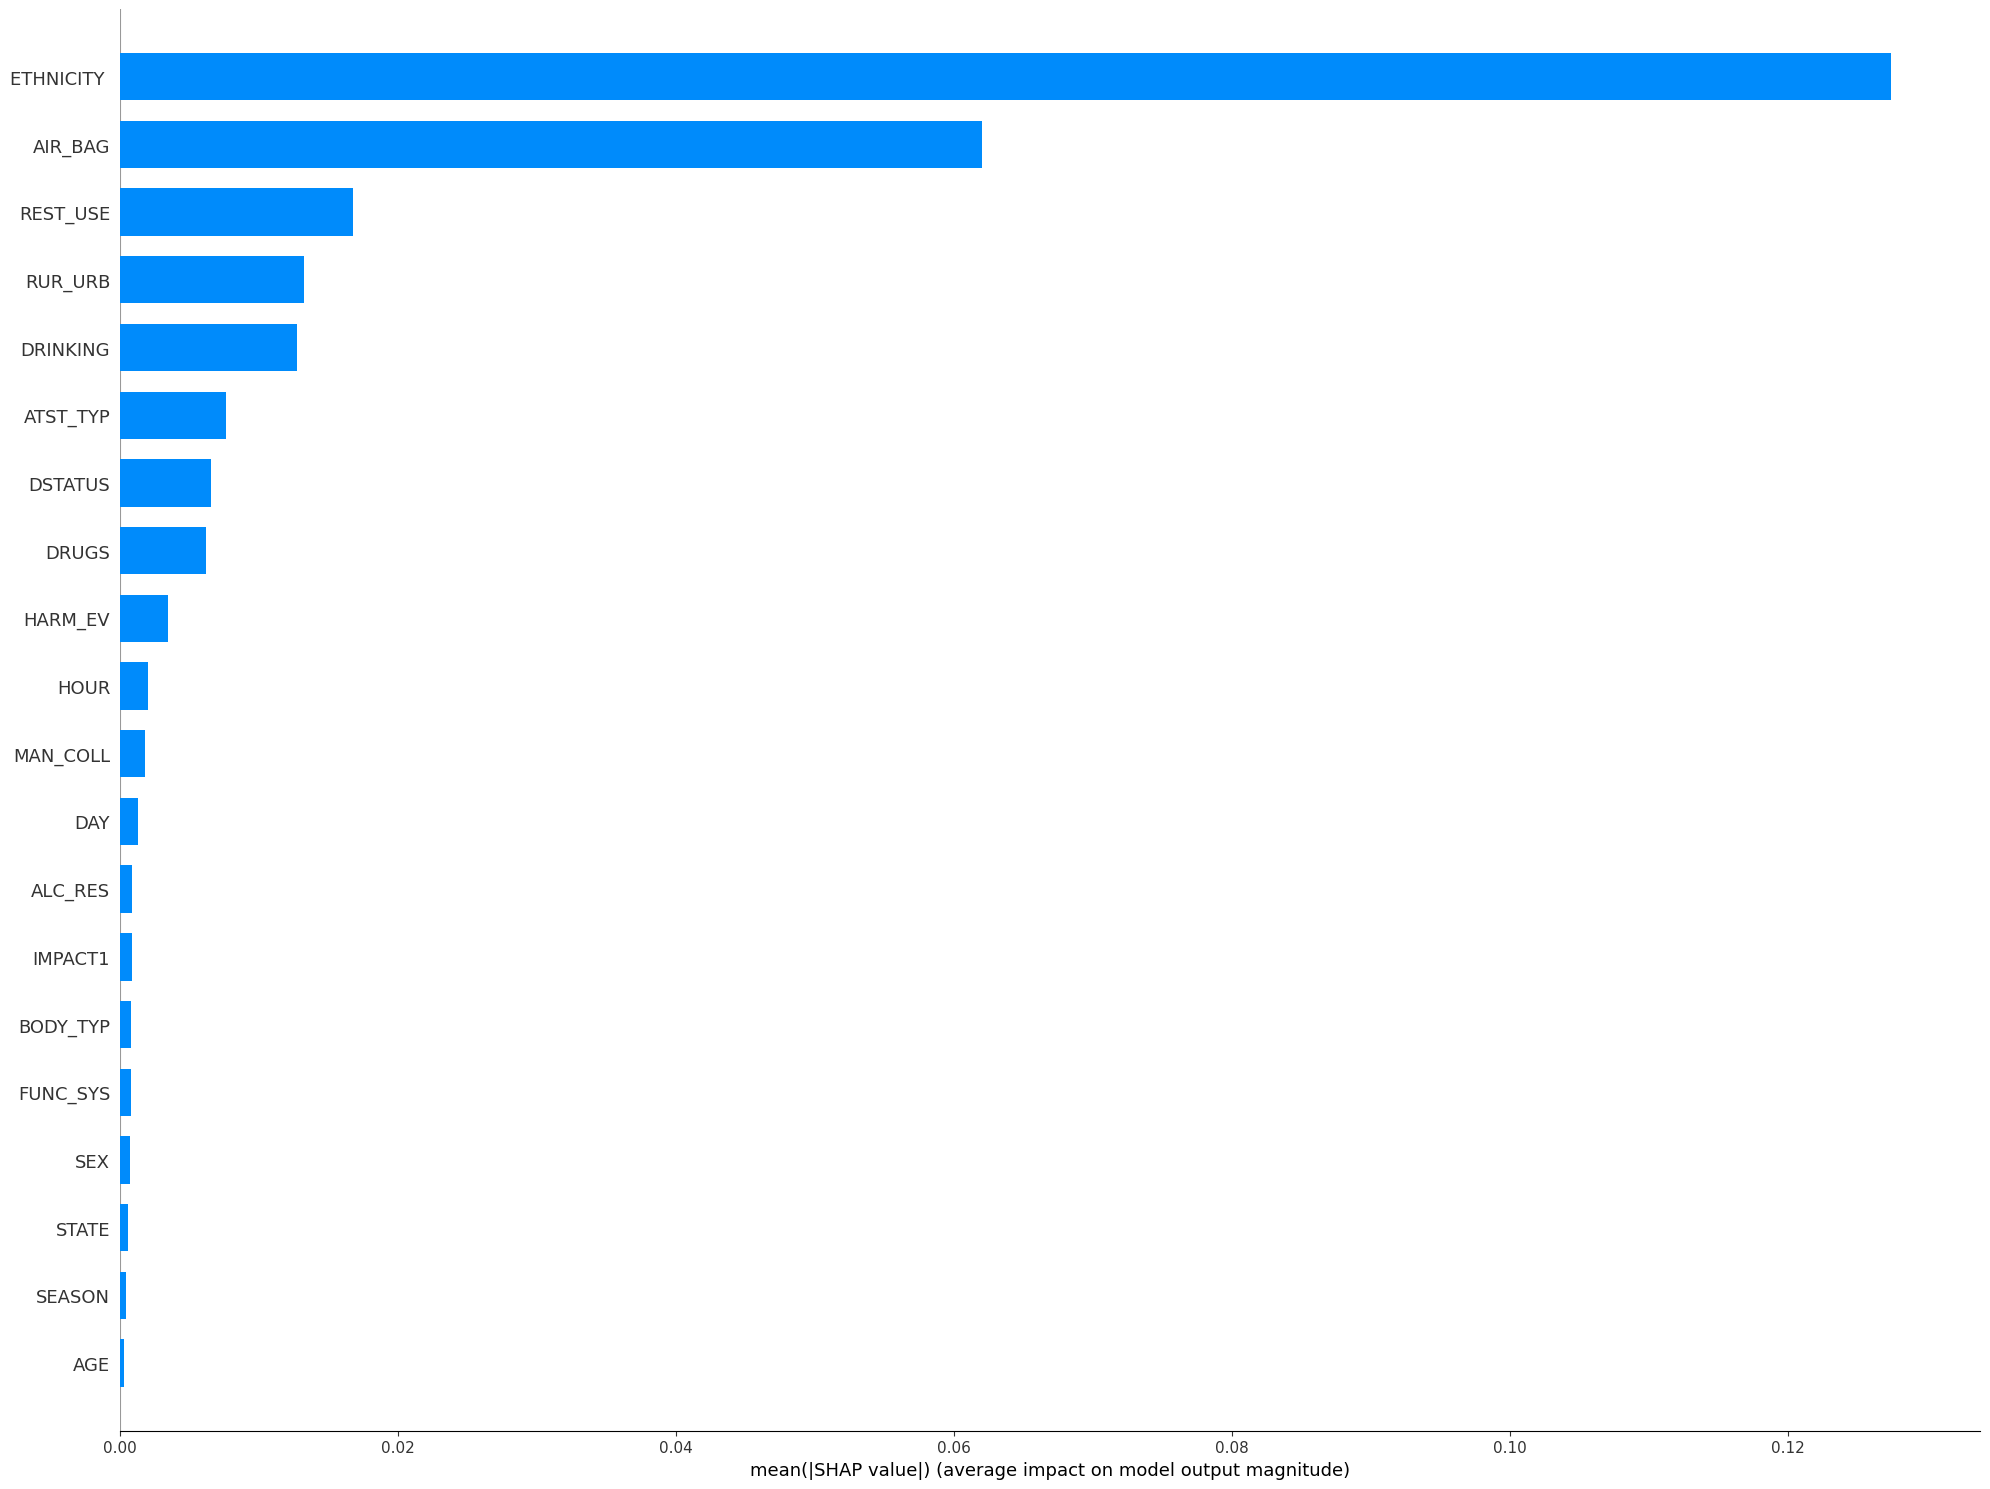

In [ ]:
shap.summary_plot(shap_values[:,:,0],X_test[:400],feature_names = features,plot_type="bar", plot_size=(20,15),show=False)